<a href="https://colab.research.google.com/github/phps-28/Data-Science-PGEBM/blob/master/Treinamento_TensorFlow/TF_pjt_8_Redes_Convolucionais_Classifica%C3%A7%C3%A3o_Sinais_Tr%C3%A2nsito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importando Libs**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
import PIL
import pickle
import zipfile

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## **Importando a base de dados**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/PGEBM/Treinamento_TensorFlow/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r') # mode = 'r' (modo de leitura (read))
zip_object.extractall('./') # './' para acessar os arquivos no ambiente do google colab
zip_object.close()

In [7]:
with open('/content/traffic-signs-data/train.p', mode = 'rb') as training_data: # mode = 'rb' - mode de leitura do arquivo

# como o arquivo é '.p' é necessário usar o 'pickle' para carregá-lo
  train = pickle.load(training_data)

with open('/content/traffic-signs-data/test.p', mode = 'rb') as testing_data:
  test = pickle.load(testing_data)

with open('/content/traffic-signs-data/valid.p', mode = 'rb') as validation_data:
  valid = pickle.load(validation_data)

## **Visualizando os Dados**

In [8]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']

In [9]:
X_train.shape

(34799, 32, 32, 3)

Base de treinamento
<br>
<br>
34799 - registros(imagens)
<br>
32x32 - dimensões das imagens
<br>
3 - canais de cores (RGB)

In [10]:
y_train.shape

(34799,)

In [11]:
X_valid.shape

(4410, 32, 32, 3)

1

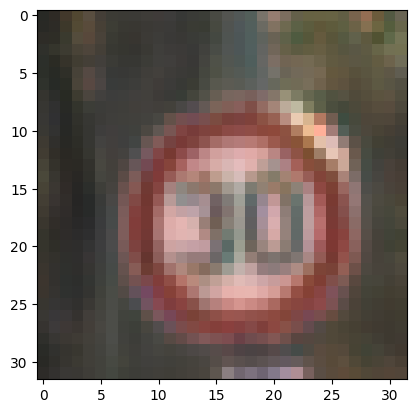

In [15]:
# Com a base de treino
i = 3100
plt.imshow(X_train[i])
y_train[i]

36

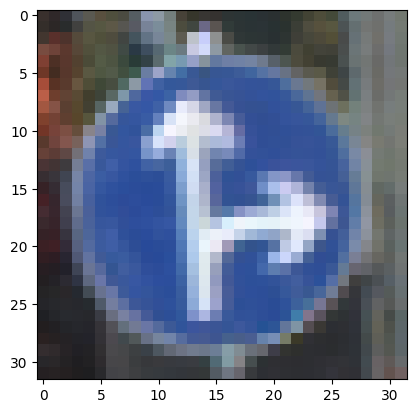

In [16]:
# Com a base de teste
i = 3001
plt.imshow(X_test[i])
y_test[i]

35

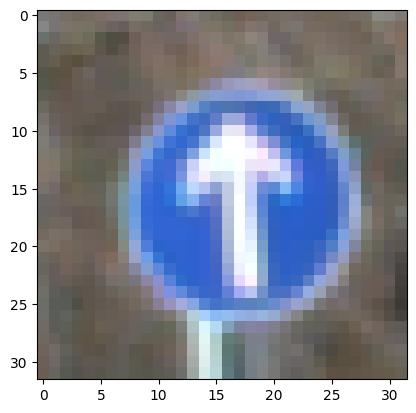

In [17]:
# Com a base de validação
i = 2500
plt.imshow(X_valid[i])
y_valid[i]

## **Preparação e Processamento dos Dados**

In [18]:
from sklearn.utils import shuffle

# Embaralhar as bases de treino
X_train, y_train = shuffle(X_train, y_train)

Fazer com que as imagens fiquem em escala de cinza, pois o processamento da rede neural é mias rápido para imagens em escala de cinza.

In [19]:
# vai somar os valores do eixo_3(eixo das cores) da base e dividor pelo número de canais (3) -> RGB
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims = True) # axis(eixo)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid / 3, axis = 3, keepdims = True)

In [20]:
X_train_gray.shape

(34799, 32, 32, 1)

Base de treinamento em Cinza
<br>
34799 - registros(imagens)
<br>
32x32 - dimensões das imagens
<br>
1 - canal de cor (Cinza)

In [21]:
X_test_gray.shape

(12630, 32, 32, 1)

In [22]:
X_valid_gray.shape

(4410, 32, 32, 1)

Fazer a normalização dos valores dos pixels, pois para o processamento da rede neural, para que haja o ganho de velocidade do treinamento, é preferível que os valores dos pixels estejam entre 0 e 1.

In [23]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_valid_gray_norm = (X_valid_gray - 128) / 128

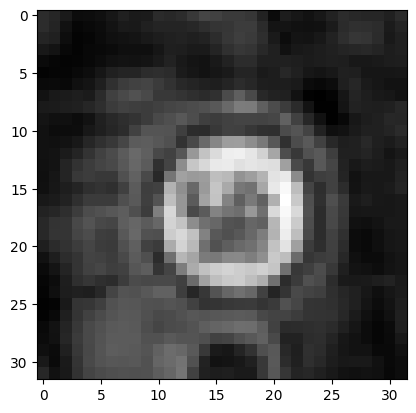

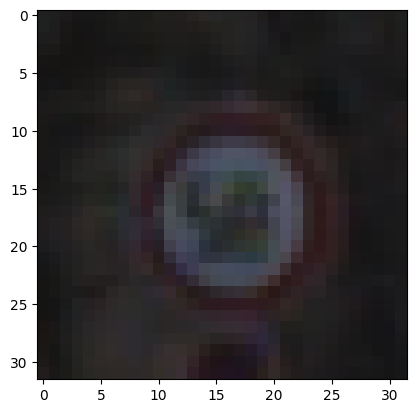

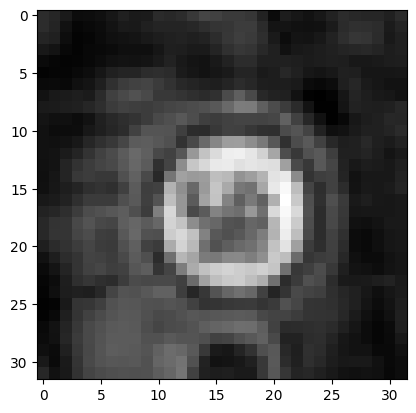

In [28]:
i = 621
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray') # imagem em cinza da base de treino
plt.figure()
plt.imshow(X_train[i]) # imagem original da base de treino
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray') # imagem com valores normalizados em cinza da base de treino

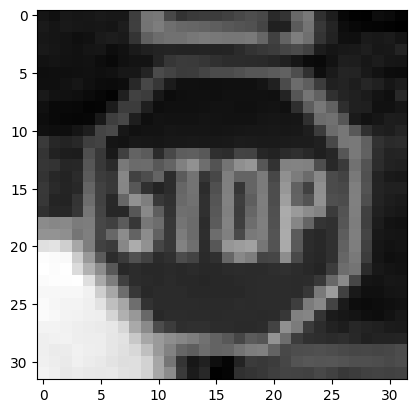

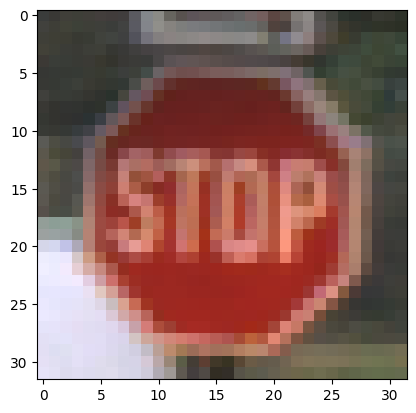

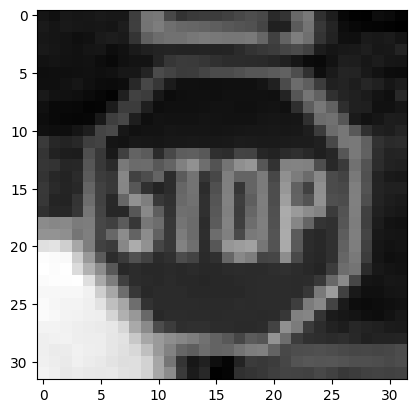

In [29]:
i = 621
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray') # imagem em cinza da base de teste
plt.figure()
plt.imshow(X_test[i]) # imagem original da base de teste
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray') # imagem com valores normalizados em cinza da base de teste

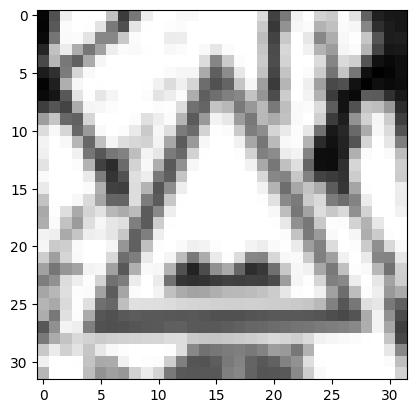

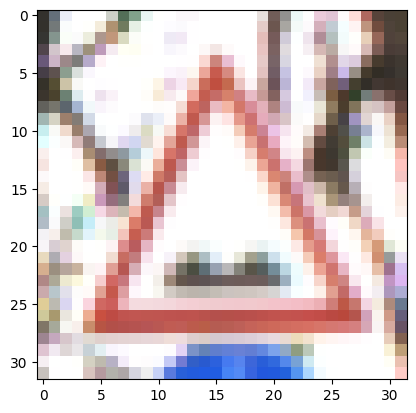

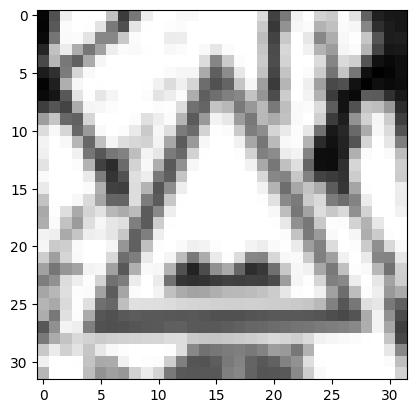

In [30]:
i = 621
plt.imshow(X_valid_gray[i].squeeze(), cmap = 'gray') # imagem em cinza da base de validação
plt.figure()
plt.imshow(X_valid[i]) # imagem original da base de validação
plt.figure()
plt.imshow(X_valid_gray_norm[i].squeeze(), cmap = 'gray') # imagem com valores normalizados em cinza da base de validação

## **Construção e Treinamento do Modelo**

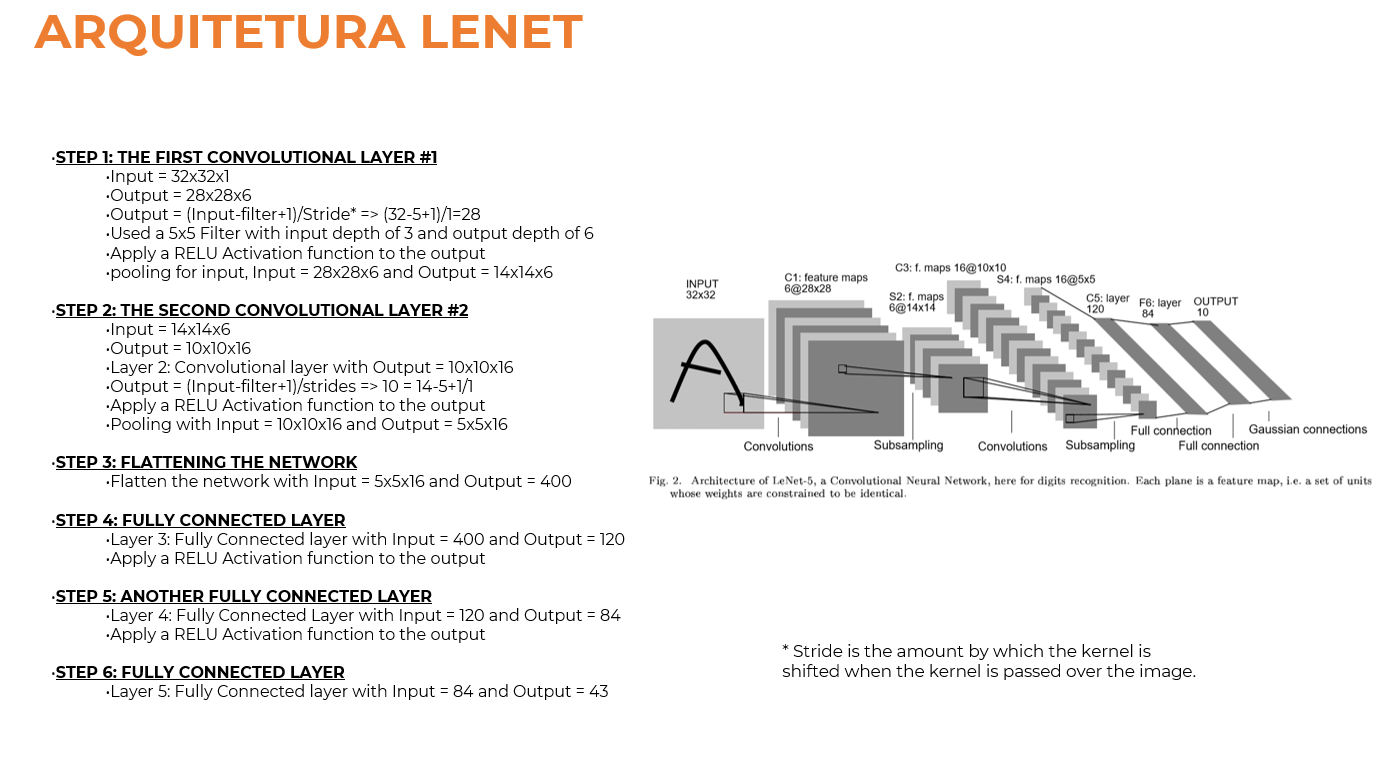

Construindo a Arquitetura do Modelo

In [36]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

# Passo 1
# 6 filtros com matriz 5x5
LeNet.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

# Passo 2
# 16 filtros com matriz 5x5
LeNet.add(layers.Conv2D(16, (5, 5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

# Passo 3
LeNet.add(layers.Flatten())

# Passo 4
LeNet.add(layers.Dense(120, activation = 'relu'))

# Passo 5
LeNet.add(layers.Dense(84, activation = 'relu'))

# Passo 6
LeNet.add(layers.Dense(43, activation = 'softmax'))

LeNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)              

In [37]:
LeNet.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [38]:
history = LeNet.fit(X_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 50,
                    validation_data = (X_valid_gray_norm, y_valid))

Epoch 1/50
70/70 [==============================] - 23s 288ms/step - loss: 3.1362 - accuracy: 0.1945 - val_loss: 2.6260 - val_accuracy: 0.3351
Epoch 2/50
70/70 [==============================] - 17s 242ms/step - loss: 1.6546 - accuracy: 0.5365 - val_loss: 1.4451 - val_accuracy: 0.5927
Epoch 3/50
70/70 [==============================] - 17s 244ms/step - loss: 0.9100 - accuracy: 0.7401 - val_loss: 0.9640 - val_accuracy: 0.7125
Epoch 4/50
70/70 [==============================] - 18s 252ms/step - loss: 0.6095 - accuracy: 0.8279 - val_loss: 0.7930 - val_accuracy: 0.7646
Epoch 5/50
70/70 [==============================] - 19s 267ms/step - loss: 0.4672 - accuracy: 0.8728 - val_loss: 0.6912 - val_accuracy: 0.8009
Epoch 6/50
70/70 [==============================] - 18s 254ms/step - loss: 0.3816 - accuracy: 0.9006 - val_loss: 0.6914 - val_accuracy: 0.8093
Epoch 7/50
70/70 [==============================] - 17s 243ms/step - loss: 0.3236 - accuracy: 0.9174 - val_loss: 0.6469 - val_accuracy: 0.8243

## **Avaliação do Modelo**

In [39]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Teste Acurácia = {}'.format(score[1]))

395/395 [==============================] - 3s 7ms/step - loss: 1.3716 - accuracy: 0.8674
Teste Acurácia = 0.8673792481422424


In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


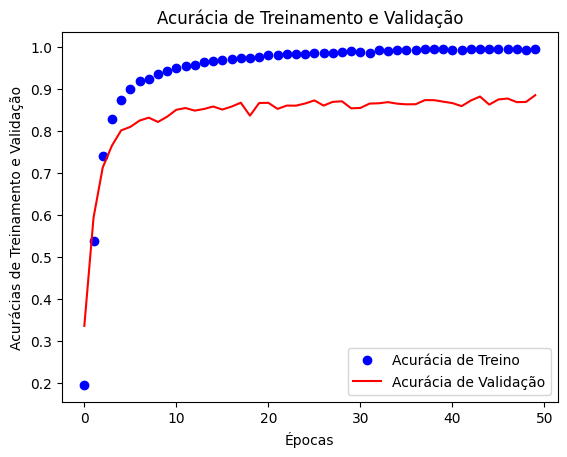

In [42]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Acurácia de Treino')
plt.plot(epochs, val_accuracy, 'r', label = 'Acurácia de Validação')
plt.title('Acurácia de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácias de Treinamento e Validação')
plt.legend();

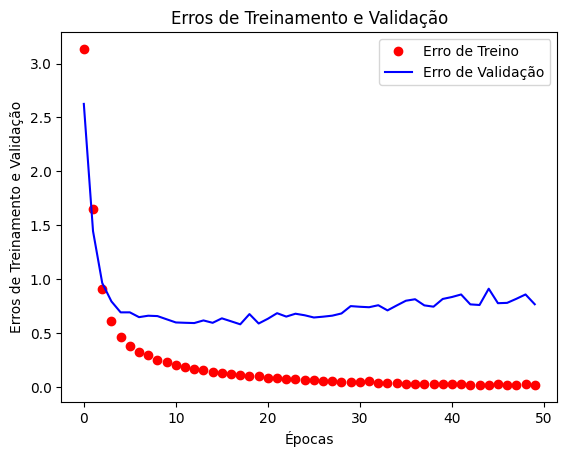

In [45]:
plt.plot(epochs, loss, 'ro', label = 'Erro de Treino')
plt.plot(epochs, val_loss, 'b', label = 'Erro de Validação')
plt.title('Erros de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Erros de Treinamento e Validação')
plt.legend();

In [46]:
predict_x = LeNet.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x, axis=1)
y_true = y_test

395/395 [==============================] - 4s 9ms/step


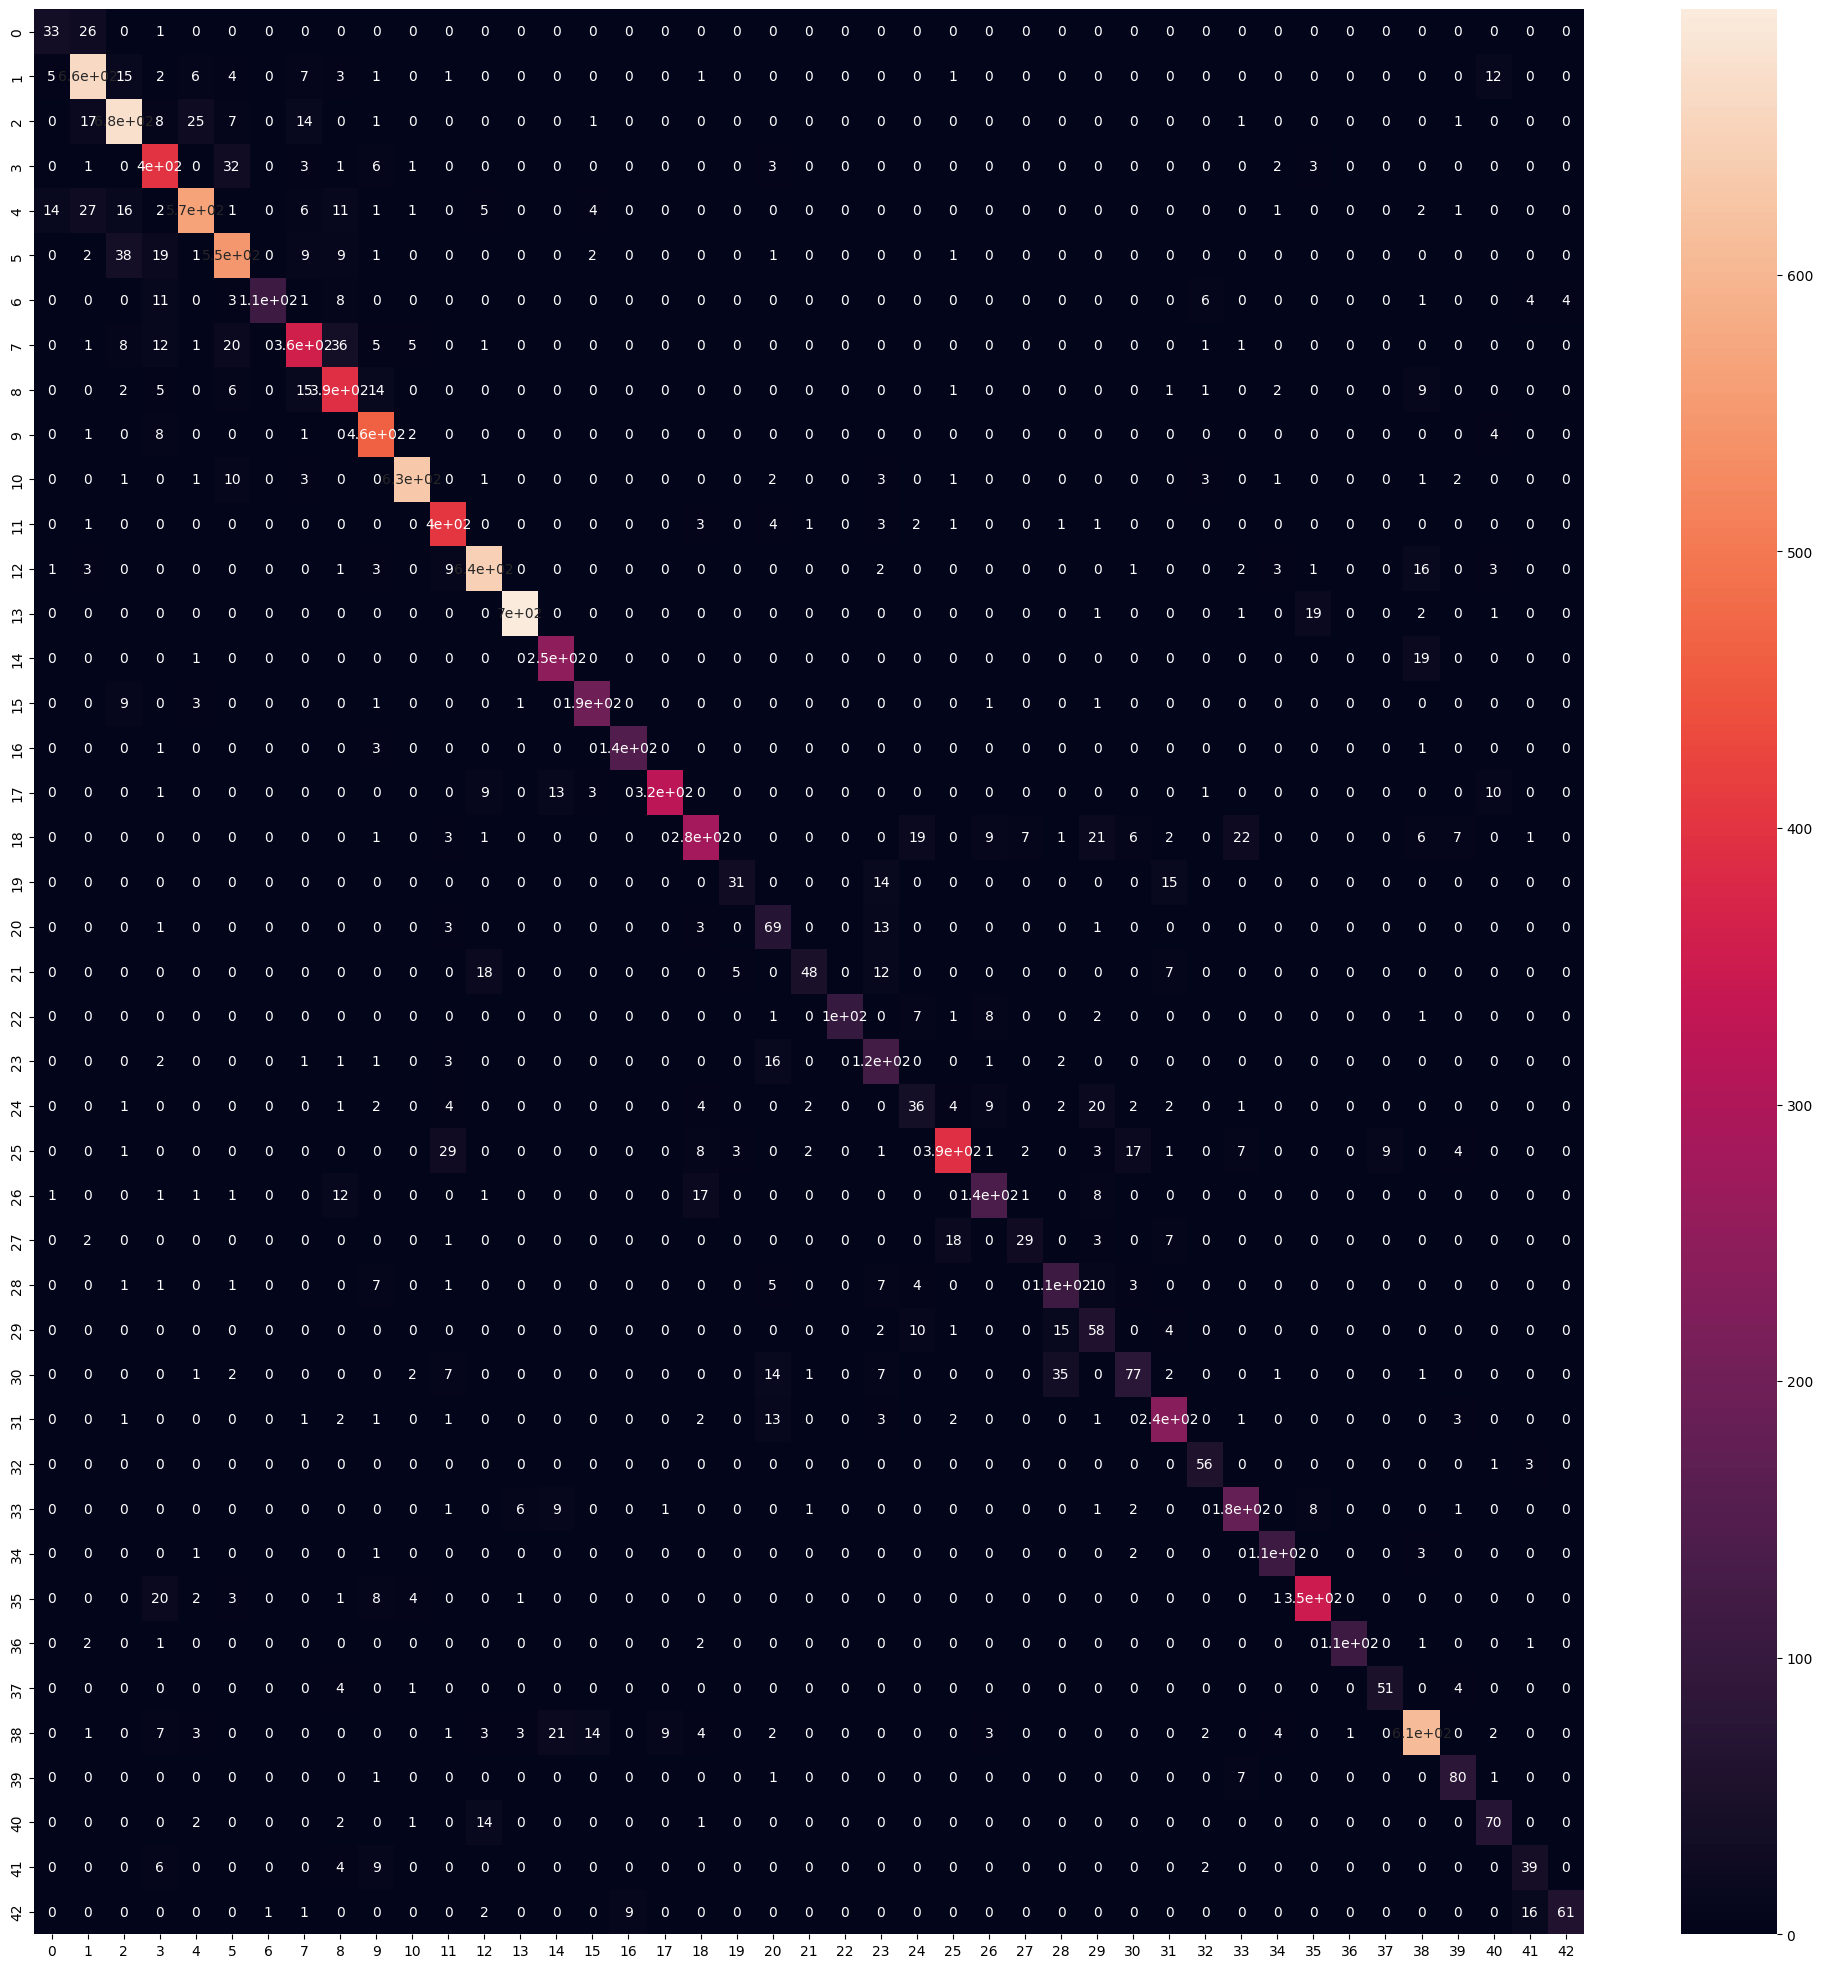

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
plt.xlabel('Real')
plt.ylabel('Predito')
sns.heatmap(cm, annot = True);

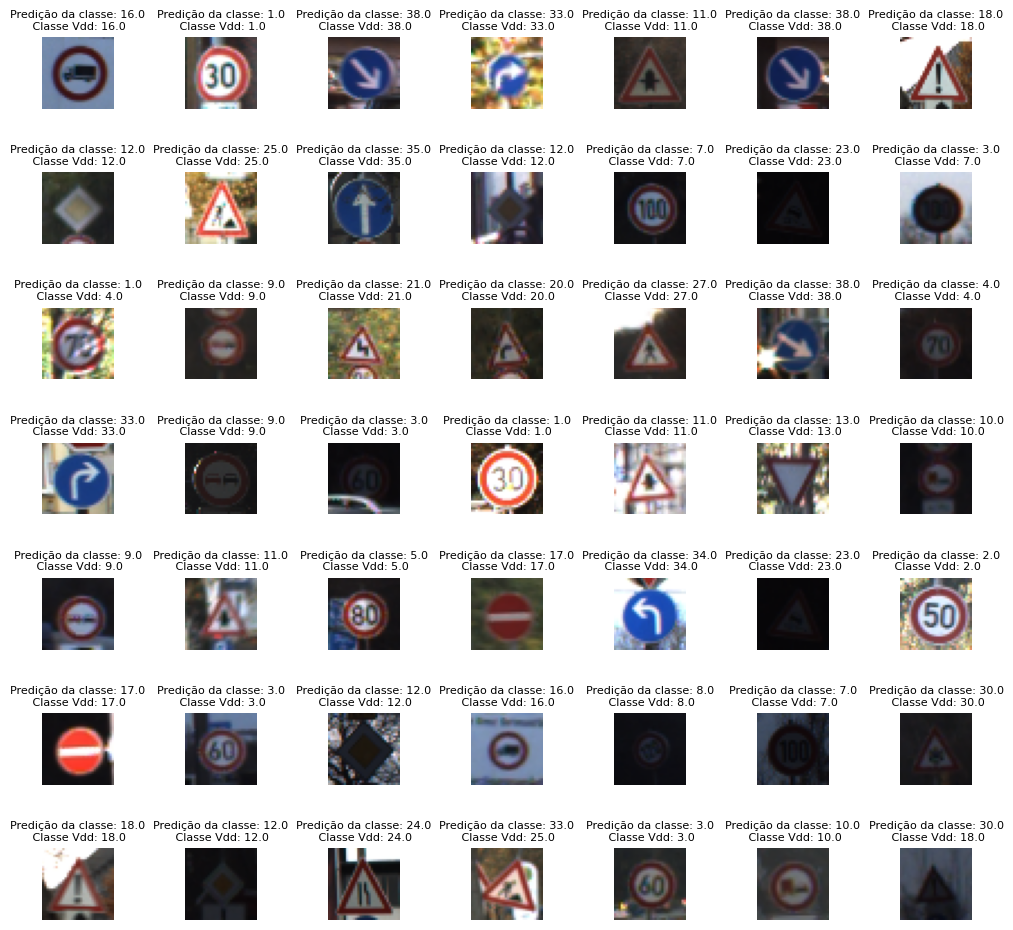

In [51]:
W_grid = 7
L_grid = 7
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12, 12))
axes = axes.ravel()


for j in np.arange(0, W_grid * L_grid):
    axes[j].imshow(X_test[j])
    axes[j].set_title("Predição da classe: {:0.1f}\n Classe Vdd: {:0.1f}".format(predicted_classes[j], y_true[j]), fontsize = 8)
    axes[j].axis('off')

plt.subplots_adjust(wspace = 1)